# Guided Project: Clean And Analyze Employee Exit Surveys

The project is to analyze the reason(s) why employees of the **Department of Education, Training and Employment (DETE)** and the **Technical and Further Education (TAFE) institute in Queensland**, Australia exit/resign their appointments.

Project objectives:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
# Importing needed libraries
# Reading in the datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
print("DETE survey info\n ====================================================")
print(dete_survey.info())
print('\n')
print("TAFE survey info\n ====================================================")
print(tafe_survey.info())

DETE survey info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Phys

In [3]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


In [7]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [8]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Observations
* tafe dataset column headings containin whitespaces
* tafe dataset columns names are too long
* There are many columns not relevant to this analysis

## Identify Missing Values and Drop Unnecessary Columns

In [9]:
# Re-importing dete_sruvey dataset to reassign the cells with "Not stated" values as NAN
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

In [10]:
# Dropping the columns not needed for analysis
dete_drop_col = dete_survey.columns[28:49] #These are the columns
dete_drop_col

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [11]:
dete_survey_updated = dete_survey.drop(dete_drop_col, axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [12]:
tafe_drop_col = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_drop_col, axis=1)

In [13]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

Columns that are same, but with different column names  and also multiple columns/answers that do not indicate an employee resigned because they were dissatisfied were removed

## Cleaning Column Names

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [15]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
col = {'Record ID': 'id', 
       'CESSATION YEAR': 'cease_date',
       'Reason for ceasing employment': 'separationtype',
       'Gender. What is your Gender?': 'gender',
       'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
      }

In [17]:
tafe_survey_updated.rename(columns=col, inplace=True)

In [18]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

The columns on dete_survey_updated were renamed in such a way to create a uniform for the columns names
Also some columns on tafe_survey_updated were renamed so that it conforms with the ones on dete_survey_updated for easy analysis

## Filtering the Data

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [22]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [23]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [24]:
tafe_resignations.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


## Verifying the Data

In [25]:
#Checking the year in cease_date for logical inconsistencies
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations['cease_date'].dtype

dtype('O')

In [27]:
#Cleanig the cease_date column
dete_resignations['cease_date'] = dete_resignations['cease_date'].copy().str.split('/').str[-1].astype(float)

In [28]:
dete_resignations.cease_date.value_counts().sort_index()

# det_res_cd = dete_resignations.cease_date.value_counts()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [29]:
dete_resignations.dete_start_date.value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [30]:
print(tafe_resignations.cease_date.value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [31]:
# type(det_res_cd)
# sns.boxplot(det_res_cd)

In [32]:
# dete_resignations.cease_date.value_counts().plot(kind='box')
# # dete_resignations.cease_date.boxplot
# plt.show()

In [33]:

# fig, ax = plt.subplots()
# ax.boxplot(dete_resignations.cease_date)
# ax.boxplot(dete_resignations.dete_start_date)
# ax.boxplot(tafe_resignations.cease_date)
# plt.show()

In [34]:
# fig = plt.figure(figsize=(4,2))
# ax1 = fig.add_subplot(1,3,1)
# ax2 = fig.add_subplot(1,3,2)
# ax3 = fig.add_subplot(1,3,3)

# ax1.boxplot(dete_resignations.cease_date)
# ax2.boxplot(dete_resignations.dete_start_date)
# ax3.boxplot(tafe_resignations.cease_date)
# plt.show()

In [35]:
# x1 = dete_resignations.cease_date
# x2 = dete_resignations.dete_start_date
# x3 = tafe_resignations.cease_date
# data = [x1, x2, x3] 

# # fig = plt.figure(1, figsize=(4,2))
# # ax = fig.add_subplot(111)
# # ax.boxplot(data)
# # plt.show()



## Create New Column

In [36]:
# Checking for the equivalent 'instutite_service' in dete_resignation 
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [37]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [38]:
# Creating a new equivalent column of no. of service years in dete_resignation

dete_resignations["institute_service"] = dete_resignations.cease_date - dete_resignations.dete_start_date

In [39]:
dete_resignations.institute_service.head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [40]:
dete_resignations.institute_service.tail()

808    3.0
815    2.0
816    2.0
819    5.0
821    NaN
Name: institute_service, dtype: float64

In [41]:
dete_resignations.institute_service.describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

In [42]:
dete_resignations.institute_service.value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In other to have a uniform column for the parameter of interest (i.e. years of service = "institute_service"), we created a column new on dete_resignation dataframe

It can be observed from the new column the there are zero values in the ew column

In [43]:
dete_resignations.institute_service.value_counts().sort_index(ascending = False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

## Identify Dissatisfied Employees

In [44]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print()
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [45]:
"""
This function majorly normalizes the 2 cols (Contributing Factors. Dissatisfaction, 
# & Contributing Factors. Job Dissatisfaction)
It replaces the '-' with 'False'
""" 
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [46]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [47]:
b = tafe_resignations[["Contributing Factors. Dissatisfaction", 'Contributing Factors. Job Dissatisfaction']]

In [48]:
b_map = b.applymap(update_vals) 

In [49]:
tafe_resignations['dissatisfied'] = b_map.any(axis=1, skipna=False)

In [50]:
x = dete_resignations[['job_dissatisfaction',
     'dissatisfaction_with_the_department',
     'physical_work_environment',
     'lack_of_recognition',
     'lack_of_job_security',
     'work_location',
     'employment_conditions',
     'work_life_balance',
     'workload']]

In [51]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [52]:
dete_resignations['dissatisfied'] = x.any(axis=1, skipna=False)

In [53]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [54]:
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [55]:
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

## Combine the Data

In [56]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [57]:
# COMBINING THE DATAFEAMES
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

C:\Users\akorede\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [58]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [59]:
# Dropping all columns whose null values (NA) are more than 500
combined_update = combined.dropna(thresh=500, axis=1).copy()

In [60]:
combined_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


## Clean Service Column

In [61]:
combined_update['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [62]:
combined_update['institute_service_up'] = combined_update['institute_service'].astype('str')

In [63]:
combined_update['institute_service_up'] = combined_update['institute_service_up'].str.extract(r'(\d+)').astype(float)

In [64]:
combined_update['institute_service_up'].value_counts().sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_up, dtype: int64

In [65]:
# Creating to group the year into the following career stages
"""
New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company
"""

def career(year):
    if year < 3:
        return 'New'
    elif year <= 6:
        return 'Experienced'
    elif year <= 10:
        return 'Established'
    elif pd.isnull(year):
        return np.nan
    else:
        return 'Veteran'

In [66]:
combined_update['service_cat'] = combined_update['institute_service_up'].apply(career)

In [67]:
combined_update['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

In [68]:
combined_update['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [69]:
combined_update['dissatisfied'] = combined_update['dissatisfied'].fillna(False)

In [70]:
diss_employ = combined_update.pivot_table(index='service_cat', values='dissatisfied')

In [71]:
diss_employ

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


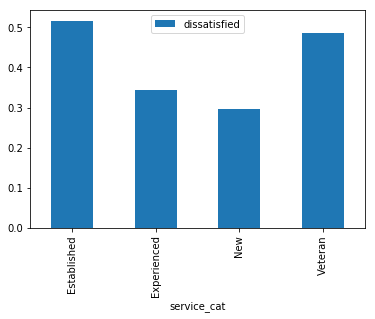

In [72]:
%matplotlib inline
diss_employ.plot(kind='bar')

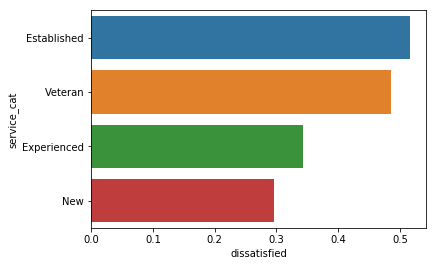

In [73]:
sns.barplot(data=combined_update, y='service_cat', x='dissatisfied', ci=None)
# diss_employ.columns

It can be observed that employees that have spent more than 7 years are mostly leaving the company

In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

* Explored the data and figured out how to prepare it for analysis
* Corrected some of the missing values
* Dropped any data not needed for our analysis
* Renamed our columns
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way
* Combined the data
* Cleaned the institute_service column
* Handled the missing values in the dissatisfied column
* Aggregated the data

Our work here is far from done! We recommend that you continue with the following steps:

Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?

**Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?**

Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
Format your project using Dataquest's project style guide.
Looking for feedback on your project? Or maybe you'd like to show it off? Head over to our Community to share your finished Guided Project! You can also view your peers' completed notebooks to see how they approached the project.

Guided projects can be used to build a portfolio to showcase to potential employers, so we really encourage you to keep working on this. You're welcome to keep working on the project here, but we recommend downloading it to your computer using the download icon above and working on it there.

Remember - if you get stuck, don't be afraid to review previous missions or use Google and StackOverflow to search for answers. This isn't easy and will take time and practice.

Congratulations on completing the course! We hope you learned a lot.





#### How many people in each age group resgined due to some kind of dissatisfaction?

In [74]:
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [75]:
combined_update['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [76]:
combined_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 12 columns):
age                     596 non-null object
cease_date              635 non-null float64
dissatisfied            651 non-null bool
employment_status       597 non-null object
gender                  592 non-null object
id                      651 non-null float64
institute               651 non-null object
institute_service       563 non-null object
position                598 non-null object
separationtype          651 non-null object
institute_service_up    563 non-null float64
service_cat             563 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 56.7+ KB


In [77]:
missing = combined_update.isnull().sum()

In [78]:
missing_age = combined_update['age'].isnull()

In [79]:
combined_update[missing_age]['service_cat']

68     Veteran
93         New
141        NaN
301        NaN
310        NaN
311        NaN
322        NaN
324        NaN
325        NaN
326        NaN
327        NaN
331        NaN
335        NaN
336        NaN
337        NaN
345        NaN
347        NaN
348        NaN
367        NaN
370        NaN
373        NaN
375        NaN
378        NaN
379        NaN
385        NaN
397        NaN
402        NaN
405        NaN
419        NaN
440        NaN
453        NaN
461        NaN
466        NaN
472        NaN
474        NaN
476        NaN
495        NaN
513        NaN
519        NaN
523        NaN
543        NaN
554        NaN
556        NaN
558        NaN
562        NaN
581        NaN
596        NaN
599        NaN
602        NaN
624        NaN
625        NaN
627        NaN
642        NaN
645        NaN
648        NaN
Name: service_cat, dtype: object

It can be pbserved from the above cell that virtually the corresponding 'service_cat' values for the missing age values are also missing. Thus we can drop these missing age rows.

In [80]:
#Extracting only the rows that are not empty with regards to the age
age = combined_update['age'].notnull()

In [81]:
combined_update_age = combined_update[age].copy()

In [82]:
combined_update_age['age'] = combined_update['age'].astype('str').str.strip().str.replace('56 or older', '56-60').str.replace('  ', '-')
# combined_update['age'] = combined_update['age'].astype(float)
# combined_update['age'].value_counts(dropna=False)

In [83]:
age_plot = combined_update_age.pivot_table(index='age', values='dissatisfied')

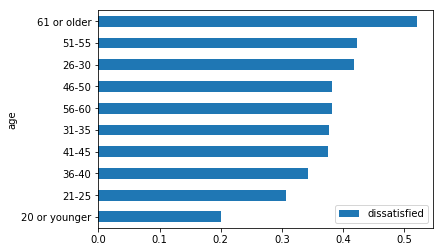

In [84]:
age_plot.sort_values(by='dissatisfied').plot(kind='barh', )

Old people of age 51 ad above are most resigning their appointment for one reasons or the other

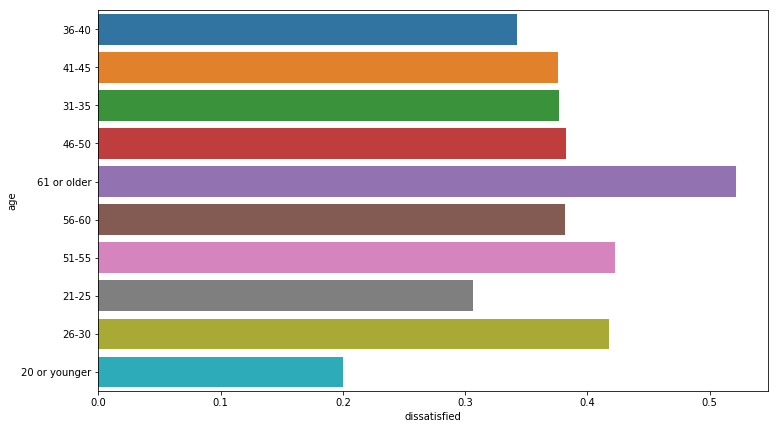

In [85]:
# sorted_combined_update_age = combined_update_age.sort_values()
plt.figure(figsize=(12,7))
sns.barplot(data=combined_update_age, y='age', x='dissatisfied', ci=None)
# sns.barplot(data=age_plot, estimator=False)
plt.show()

In [86]:
age_plot

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


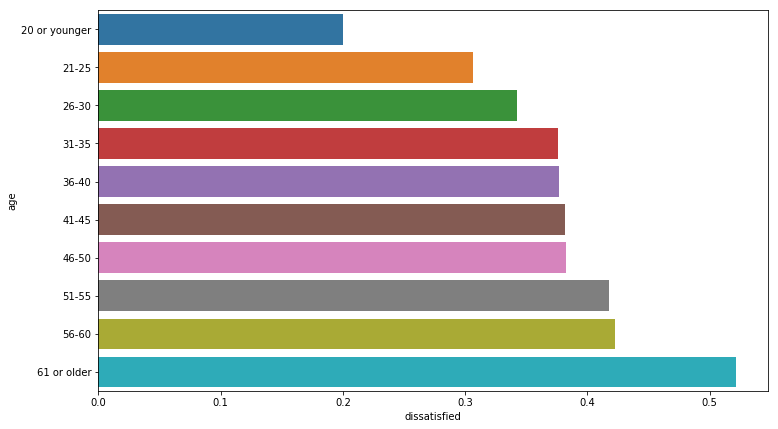

In [87]:
plt.figure(figsize=(12,7))
sns.barplot(data=age_plot.sort_values(by='dissatisfied'), y=age_plot.index, x='dissatisfied', ci=None)
plt.show()

In [88]:
combined_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 12 columns):
age                     596 non-null object
cease_date              635 non-null float64
dissatisfied            651 non-null bool
employment_status       597 non-null object
gender                  592 non-null object
id                      651 non-null float64
institute               651 non-null object
institute_service       563 non-null object
position                598 non-null object
separationtype          651 non-null object
institute_service_up    563 non-null float64
service_cat             563 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 56.7+ KB


## DETE SURVEY

In [89]:
combined_update_dete = combined_update[combined_update['institute'] == 'DETE'].copy()

In [90]:
print(combined_update.shape)
print(combined_update_dete.shape)

(651, 12)
(311, 12)


In [91]:
combined_update_dete.pivot_table(index='service_cat', values='dissatisfied')

,dissatisfied
service_cat,
Established,0.609756
Experienced,0.460526
New,0.375000
Veteran,0.560000


C:\Users\akorede\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


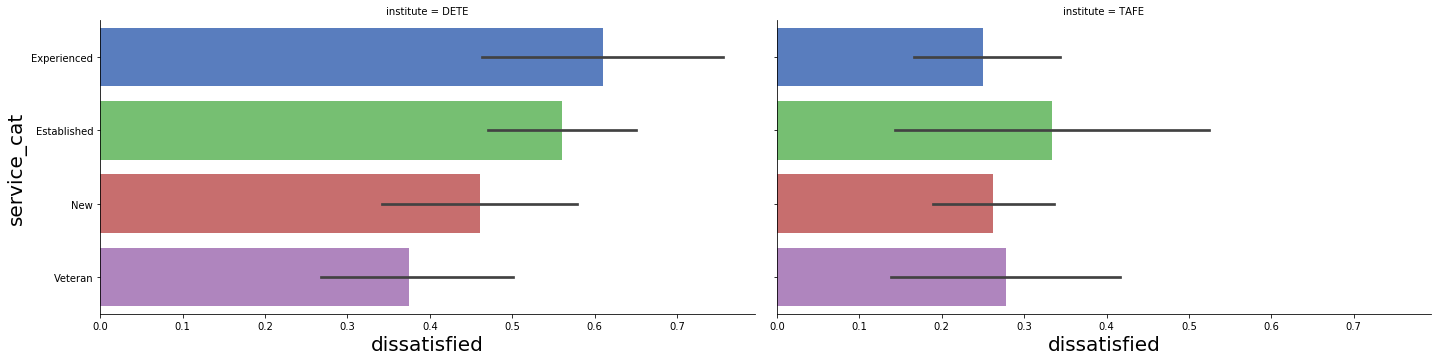

In [100]:
plt.figure(figsize=(7,50))
# sns.set(font_scale=2)
graph = sns.FacetGrid(combined_update, col='institute', aspect=2, size=5)
graph.map(sns.barplot, 'dissatisfied', 'service_cat', palette=sns.color_palette('muted'))
# graph.set(font_scale=5)
graph.set_xlabels(fontsize=20)
graph.set_ylabels(fontsize=20)
graph.set_titles(fontsize=40)
# graph.fig.texts(fontsize=20)
plt.show()

In [93]:
help(graph.map)

Help on method map in module seaborn.axisgrid:

map(func, *args, **kwargs) method of seaborn.axisgrid.FacetGrid instance
    Apply a plotting function to each facet's subset of the data.
    
    Parameters
    ----------
    func : callable
        A plotting function that takes data and keyword arguments. It
        must plot to the currently active matplotlib Axes and take a
        `color` keyword argument. If faceting on the `hue` dimension,
        it must also take a `label` keyword argument.
    args : strings
        Column names in self.data that identify variables with data to
        plot. The data for each variable is passed to `func` in the
        order the variables are specified in the call.
    kwargs : keyword arguments
        All keyword arguments are passed to the plotting function.
    
    Returns
    -------
    self : object
        Returns self.



In [94]:
x = combined_update.pivot_table(values='dissatisfied', index=['institute', 'service_cat'])
x

dissatisfied
institute service_cat              
DETE      Established      0.609756
          Experienced      0.460526
          New              0.375000
          Veteran          0.560000
TAFE      Established      0.333333
          Experienced      0.250000
          New              0.262774
          Veteran          0.277778

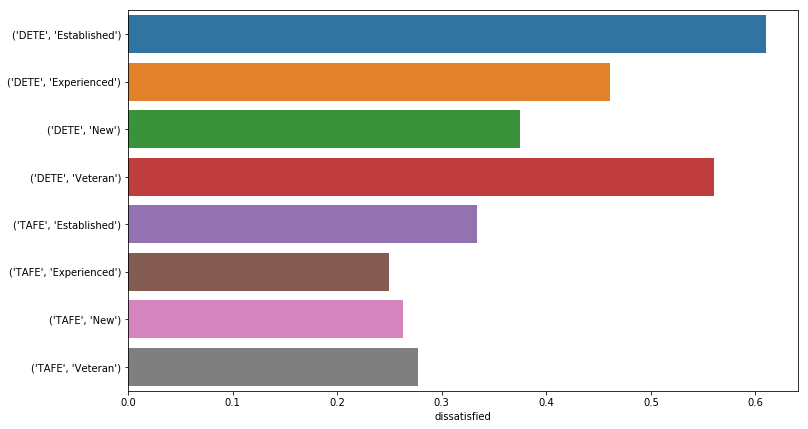

In [95]:
plt.figure(figsize=(12,7))
sns.barplot(data=x, x = 'dissatisfied', y = x.index)